In [1]:
# importing lab

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

## problem statement
- To predict the house price

## data gathering

In [3]:
boston=load_boston()

In [4]:
#Check the description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
df["PRICE"]=boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 4)EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
# Check Assumption of linear regression

## 1.linearity

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

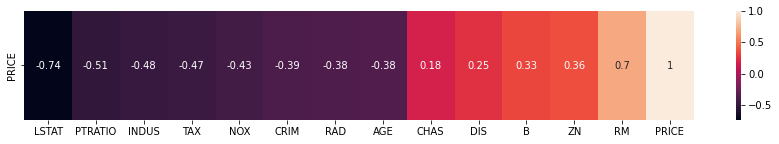

In [14]:
corr=df.corr().tail(1).sort_values("PRICE",axis=1)
corr
plt.figure(figsize=(15,2))
sns.heatmap(corr,annot=True)

## 2.no multicolinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
x=df.drop("PRICE",axis=1)
variance_inflation_factor(x.to_numpy(),0)

2.1003728199615224

In [17]:
x.shape[1]

13

In [18]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [19]:
x.columns[0]

'CRIM'

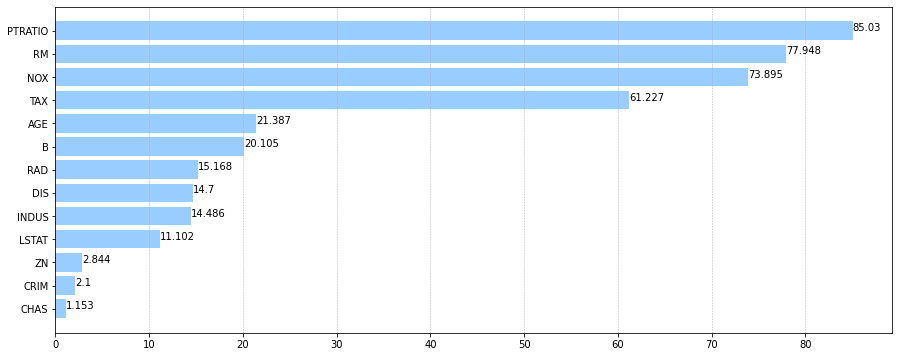

In [20]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
df2=pd.DataFrame({
    "a":x.columns,
    "b":np.around(vif_list,3)
})
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot(111)
df2.sort_values("b",inplace=True)
ret=ax1.barh(df2["a"],df2["b"], color='#99ccff')
ax1.xaxis.grid(linestyle='--',linewidth=0.5)
for i,j in enumerate(df2.b):
     ax1.annotate(j,xy=(j,i))
plt.show()

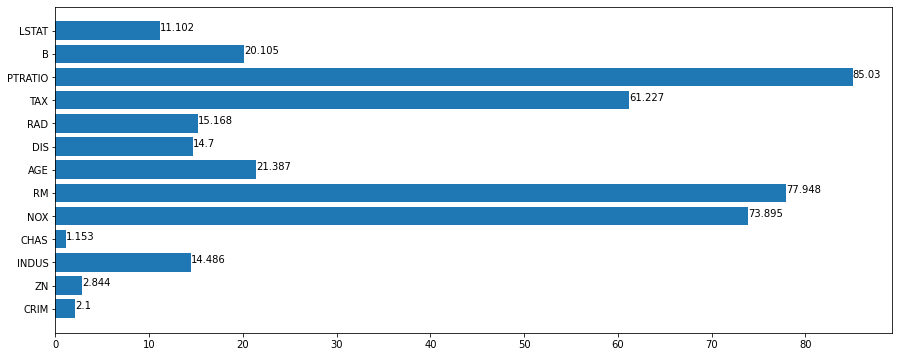

In [21]:
fig=plt.figure(figsize=(15,6))
a=x.columns
b=np.around(vif_list,3)
plt.barh(a,b)
for i,j in enumerate(b):
        plt.text(j,i,str(j))


In [22]:
from scipy import stats

<AxesSubplot: xlabel='CRIM'>

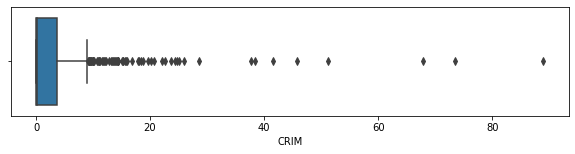

In [23]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df["CRIM"])

In [24]:
q1 = df["CRIM"].quantile(0.25)
q2 = df["CRIM"].quantile(0.50)
q3 = df["CRIM"].quantile(0.75)

median = df["CRIM"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)

Q1 : 0.08204499999999999
Q2 : 0.25651
Q3 : 3.6770825
Median: 0.25651


In [25]:
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Upper_tail: 14.462195000000001
Lower_Tail: -10.7030675


In [26]:
df.loc[df["CRIM"] > upper_tail,"CRIM"]=upper_tail

In [27]:
df.loc[df["CRIM"] < lower_tail,"CRIM"]=lower_tail

In [28]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [29]:
q1 = df["ZN"].quantile(0.25)
q2 = df["ZN"].quantile(0.50)
q3 = df["ZN"].quantile(0.75)

median = df["ZN"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 12.5
Median: 0.0
Upper_tail: 50.0
Lower_Tail: -37.5


In [30]:
df.loc[df["ZN"] > upper_tail,"ZN"]=upper_tail

In [31]:
df.loc[df["ZN"] < lower_tail,"ZN"]=lower_tail

In [32]:
q1 = df["INDUS"].quantile(0.25)
q2 = df["INDUS"].quantile(0.50)
q3 = df["INDUS"].quantile(0.75)

median = df["INDUS"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 5.19
Q2 : 9.69
Q3 : 18.1
Median: 9.69
Upper_tail: 56.830000000000005
Lower_Tail: -33.540000000000006


In [33]:
df.loc[df["INDUS"] > upper_tail,"INDUS"]

Series([], Name: INDUS, dtype: float64)

In [34]:
df.loc[df["INDUS"] > upper_tail,"INDUS"]=upper_tail

In [35]:
df.loc[df["INDUS"] < lower_tail,"INDUS"]=lower_tail

In [36]:
q1 = df["NOX"].quantile(0.25)
q2 = df["NOX"].quantile(0.50)
q3 = df["NOX"].quantile(0.75)

median = df["NOX"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 0.449
Q2 : 0.538
Q3 : 0.624
Median: 0.538
Upper_tail: 1.149
Lower_Tail: -0.0759999999999999


In [37]:
df.loc[df["NOX"] > upper_tail,"NOX"]=upper_tail

In [38]:
df.loc[df["NOX"] < lower_tail,"NOX"]=lower_tail

In [39]:
q1 = df["RM"].quantile(0.25)
q2 = df["RM"].quantile(0.50)
q3 = df["RM"].quantile(0.75)

median = df["RM"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 5.8854999999999995
Q2 : 6.2085
Q3 : 6.6235
Median: 6.2085
Upper_tail: 8.837500000000002
Lower_Tail: 3.671499999999998


In [40]:
df.loc[df["RM"] > upper_tail,"RM"]=upper_tail

In [41]:
df.loc[df["RM"] < lower_tail,"RM"]=lower_tail

In [42]:
q1 = df["AGE"].quantile(0.25)
q2 = df["AGE"].quantile(0.50)
q3 = df["AGE"].quantile(0.75)

median = df["AGE"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 45.025
Q2 : 77.5
Q3 : 94.07499999999999
Median: 77.5
Upper_tail: 241.22499999999997
Lower_Tail: -102.12499999999997


In [43]:
df.loc[df["AGE"] > upper_tail,"AGE"]=upper_tail

In [44]:
df.loc[df["AGE"] < lower_tail,"AGE"]=lower_tail

In [45]:
q1 = df["DIS"].quantile(0.25)
q2 = df["DIS"].quantile(0.50)
q3 = df["DIS"].quantile(0.75)

median = df["DIS"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 2.100175
Q2 : 3.2074499999999997
Q3 : 5.1884250000000005
Median: 3.2074499999999997
Upper_tail: 14.453175000000002
Lower_Tail: -7.164575000000001


In [46]:
df.loc[df["DIS"] > upper_tail,"DIS"]=upper_tail

In [47]:
df.loc[df["DIS"] < lower_tail,"DIS"]=lower_tail

In [48]:
q1 = df["RAD"].quantile(0.25)
q2 = df["RAD"].quantile(0.50)
q3 = df["RAD"].quantile(0.75)

median = df["RAD"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 4.0
Q2 : 5.0
Q3 : 24.0
Median: 5.0
Upper_tail: 84.0
Lower_Tail: -56.0


In [49]:
df.loc[df["RAD"] > upper_tail,"RAD"]=upper_tail

In [50]:
df.loc[df["RAD"] < lower_tail,"RAD"]=lower_tail

In [51]:
q1 = df["TAX"].quantile(0.25)
q2 = df["TAX"].quantile(0.50)
q3 = df["TAX"].quantile(0.75)

median = df["TAX"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 279.0
Q2 : 330.0
Q3 : 666.0
Median: 330.0
Upper_tail: 1827.0
Lower_Tail: -882.0


In [52]:
df.loc[df["TAX"] > upper_tail,"TAX"]=upper_tail

In [53]:
df.loc[df["TAX"] < lower_tail,"TAX"]=lower_tail

In [54]:
q1 = df["PTRATIO"].quantile(0.25)
q2 = df["PTRATIO"].quantile(0.50)
q3 = df["PTRATIO"].quantile(0.75)

median = df["PTRATIO"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 17.4
Q2 : 19.05
Q3 : 20.2
Median: 19.05
Upper_tail: 28.6
Lower_Tail: 8.999999999999996


In [55]:
df.loc[df["PTRATIO"] > upper_tail,"PTRATIO"]=upper_tail

In [56]:
df.loc[df["PTRATIO"] < lower_tail,"PTRATIO"]=lower_tail

In [57]:
q1 = df["B"].quantile(0.25)
q2 = df["B"].quantile(0.50)
q3 = df["B"].quantile(0.75)

median = df["B"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 375.3775
Q2 : 391.44
Q3 : 396.225
Median: 391.44
Upper_tail: 458.7675000000001
Lower_Tail: 312.8349999999999


In [58]:
df.loc[df["B"] > upper_tail,"B"]=upper_tail

In [59]:
df.loc[df["B"] < lower_tail,"B"]=lower_tail

In [60]:
q1 = df["LSTAT"].quantile(0.25)
q2 = df["LSTAT"].quantile(0.50)
q3 = df["LSTAT"].quantile(0.75)

median = df["LSTAT"].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median:",median)
iqr = q3 - q1

upper_tail = q3 + 3*iqr
lower_tail = q1 - 3*iqr

print("Upper_tail:",upper_tail)
print("Lower_Tail:",lower_tail)

Q1 : 6.949999999999999
Q2 : 11.36
Q3 : 16.955000000000002
Median: 11.36
Upper_tail: 46.97000000000001
Lower_Tail: -23.06500000000001


In [61]:
df.loc[df["LSTAT"] > upper_tail,"LSTAT"]=upper_tail

In [62]:
df.loc[df["LSTAT"] < lower_tail,"LSTAT"]=lower_tail

In [63]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [64]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.721417,8.967391,11.136779,0.069170,0.554695,6.284853,68.574901,3.795043,9.549407,408.237154,18.455534,377.805455,12.653063,22.532806
std,4.466174,16.522305,6.860353,0.253994,0.115878,0.701786,28.148861,2.105710,8.707259,168.537116,2.164946,27.953147,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.671500,2.900000,1.129600,1.000000,187.000000,12.600000,312.835000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,14.462195,50.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Train model

In [65]:
x  = df.drop("PRICE",axis = 1)
y = df["PRICE"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=11)

In [66]:
## standardize the dataset
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()

In [67]:
#x_train=scaler.fit_transform(x_train)

In [68]:
#x_test=scaler.transform(x_test)

# 1.Linear regression

In [69]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [70]:
#Training Data Evaluation

y_pred_train = linear_reg_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 22.005167462102683
RMSE: 4.690966580791499
MAE: 3.310199653637448
R-Squared value: 0.7295791793821331


In [71]:
1-(1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.7192395597702735

In [72]:
#Testing Data Evaluation

y_pred = linear_reg_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 25.640823080557073
RMSE: 5.063676834135159
MAE: 3.6248870278459773
R-Squared value: 0.7194698359142755


In [73]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6930430813264898

In [74]:
linear_reg_model.coef_

array([-1.64425863e-01,  4.42456688e-02,  3.90544545e-02,  3.00591459e+00,
       -1.91348423e+01,  3.94431455e+00,  1.92380817e-02, -1.22848919e+00,
        3.46483795e-01, -1.46840945e-02, -9.60242977e-01,  1.23206134e-02,
       -5.41968239e-01])

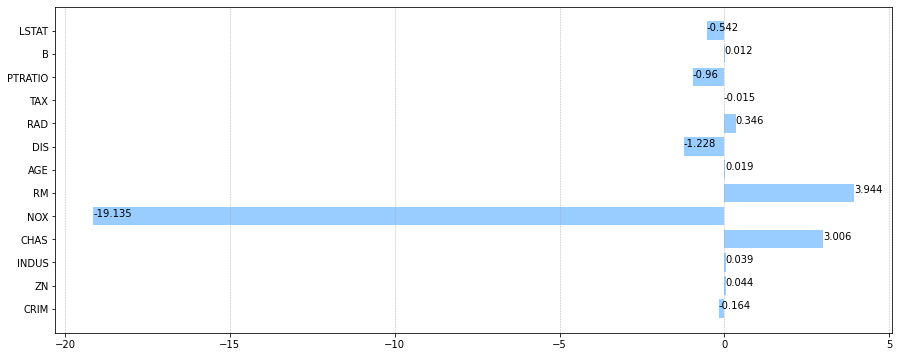

In [75]:
df3=pd.DataFrame({
    "a":x.columns,
    "b":np.around(linear_reg_model.coef_,3)
})
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot(111)
df2.sort_values("b",inplace=True)
ret=ax1.barh(df3["a"],df3["b"], color='#99ccff')
ax1.xaxis.grid(linestyle='--',linewidth=0.5)
for i,j in enumerate(df3.b):
     ax1.annotate(j,xy=(j,i))
plt.show()

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 1.Ridge

### i.Gride_search

In [77]:
%%time

ridge_model = Ridge()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,param_grid,cv=5)
gscv_ridge_model.fit(x_train,y_train)

CPU times: total: 5.02 s
Wall time: 5.18 s


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [78]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.15000000000000002)

### ii.Randomized_search

In [79]:
%%time
ridge_model = Ridge()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model,param_grid,cv=5)
rscv_ridge_model.fit(x_train,y_train)

CPU times: total: 156 ms
Wall time: 213 ms


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [80]:
rscv_ridge_model.best_estimator_

Ridge(alpha=0.68)

## 2.Lasso

### i.Gride_search

In [81]:
%%time
lasso_model = Lasso()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,param_grid,cv=5)
gscv_lasso_model.fit(x_train,y_train)

CPU times: total: 5.22 s
Wall time: 5.47 s


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [82]:
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

### ii.Randomized_search

In [83]:
%%time
lasso_model = Lasso()

param_grid = {"alpha":np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(lasso_model,param_grid,cv=5)
rscv_lasso_model.fit(x_train,y_train)

CPU times: total: 203 ms
Wall time: 209 ms


RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [84]:
rscv_lasso_model.best_estimator_

Lasso(alpha=0.14)

### Ridge Regression after tuning alpha value

In [85]:
ridge_reg_model = Ridge(alpha=0.15000000000000002) #  alpha = Lambda
ridge_reg_model.fit(x_train,y_train)

Ridge(alpha=0.15000000000000002)

In [86]:
#Training Data Evaluation

y_pred_train = ridge_reg_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 22.021651695351963
RMSE: 4.692723270698152
MAE: 3.2999012394632734
R-Squared value: 0.7293766051508667


In [87]:
#Testing Data Evaluation

y_pred = ridge_reg_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 25.605210817390056
RMSE: 5.060159169175418
MAE: 3.6156624588809043
R-Squared value: 0.7198594612394189


### Lasso Regression after tuning alpha value

In [88]:
lasso_reg_model = Lasso(alpha=0.01) #  alpha = Lambda
lasso_reg_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [89]:
#Training Data Evaluation

y_pred_train = lasso_reg_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2)

MSE: 22.041543758366004
RMSE: 4.694842250636969
MAE: 3.2956397955211396
R-Squared value: 0.729132152205289


In [90]:
#Testing Data Evaluation

y_pred = lasso_reg_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared value:",r2)

MSE: 25.597986058549946
RMSE: 5.059445232290784
MAE: 3.6134676337817324
R-Squared value: 0.7199385056123911


In [91]:
0.7295791793821331 - 0.7194698359142755  #linear regression

0.010109343467857634

In [92]:
0.7293766051508667 - 0.7198594612394189  #ridge R2 after best alpha 

0.009517143911447756

In [93]:
0.729132152205289 - 0.7199385056123911  #Lasso R2 after best alpha 

0.009193646592897897

## New Data prediction

In [94]:
boston.data[[0]]

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [95]:
##Transformation of new data
#scaler.transform(boston.data[[0]])

In [96]:
lasso_reg_model.predict(boston.data[[0]]) #24

array([30.16735411])

In [97]:
#ridge_reg_model.predict(scaler.transform(boston.data[[0]])) #24

In [98]:
#linear_reg_model.predict(scaler.transform(boston.data[[0]])) #24

### Pickling The model file for deployment

In [99]:
import pickle

In [100]:
pickle.dump(lasso_reg_model,open('Boston.pkl','wb'))

In [101]:
pickled_model=pickle.load(open('Boston.pkl','rb'))

In [102]:
pickled_model.predict(boston.data[[0]])

array([30.16735411])

In [103]:
# Json File

In [104]:
import json
project_data={"columns" : list(x.columns)}
project_data

{'columns': ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT']}

In [105]:
with open("project_data.json", "w") as f:
    json.dump(project_data,f)